In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Create a Dataframe and store it in a variable from the given dataset
df=pd.read_csv("https://raw.githubusercontent.com/jayalekshmi37/wine/refs/heads/main/WineQT.csv")
# Print the first 5 rows in the DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [28]:
#Values present in the quality attribute
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [29]:
#data types
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [30]:
#number of rows and columns
print(df.shape)

(2926, 13)


In [31]:
#description of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,7.208031,0.543344,0.221258,2.749197,0.074264,12.461210,38.880212,0.995788,3.411463,0.641794,11.083675,5.545113,967.387560
std,1.737628,0.194846,0.156298,1.515348,0.033382,8.374694,26.481403,0.002015,0.251843,0.133164,1.218204,1.808389,596.160687
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,6.800000,0.380000,0.070000,2.000000,0.056000,6.000000,19.000000,0.994190,3.230000,0.560000,10.200000,4.000000,325.250000
50%,7.200000,0.520000,0.210000,2.100000,0.074000,11.000000,29.000000,0.995100,3.350000,0.610000,11.300000,5.000000,1325.500000
75%,7.500000,0.660000,0.310000,2.600000,0.082000,17.000000,65.000000,0.997895,3.470000,0.740000,11.400000,8.000000,1478.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


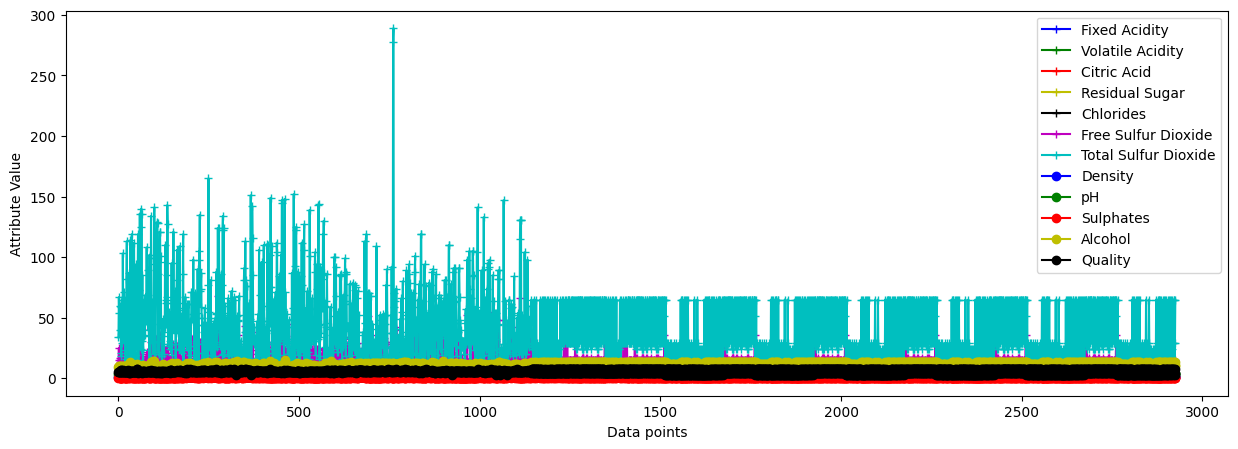

In [32]:
# Create the plot
plt.figure(figsize=(15, 5))

# Plot each attribute with different colors and marker styles
plt.plot(df["fixed acidity"], "b-+", label="Fixed Acidity")
plt.plot(df["volatile acidity"], "g-+", label="Volatile Acidity")
plt.plot(df["citric acid"], "r-+", label="Citric Acid")
plt.plot(df["residual sugar"], "y-+", label="Residual Sugar")
plt.plot(df["chlorides"], "k-+", label="Chlorides")
plt.plot(df["free sulfur dioxide"], "m-+", label="Free Sulfur Dioxide")
plt.plot(df["total sulfur dioxide"], "c-+", label="Total Sulfur Dioxide")
plt.plot(df["density"], "b-o", label="Density")
plt.plot(df["pH"], "g-o", label="pH")
plt.plot(df["sulphates"], "r-o", label="Sulphates")
plt.plot(df["alcohol"], "y-o", label="Alcohol")
plt.plot(df["quality"], "k-o", label="Quality")

# Add a legend to the plot
plt.legend(loc="upper right")

plt.xlabel("Data points")
plt.ylabel("Attribute Value")

plt.show()


In [33]:
# Check for null values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


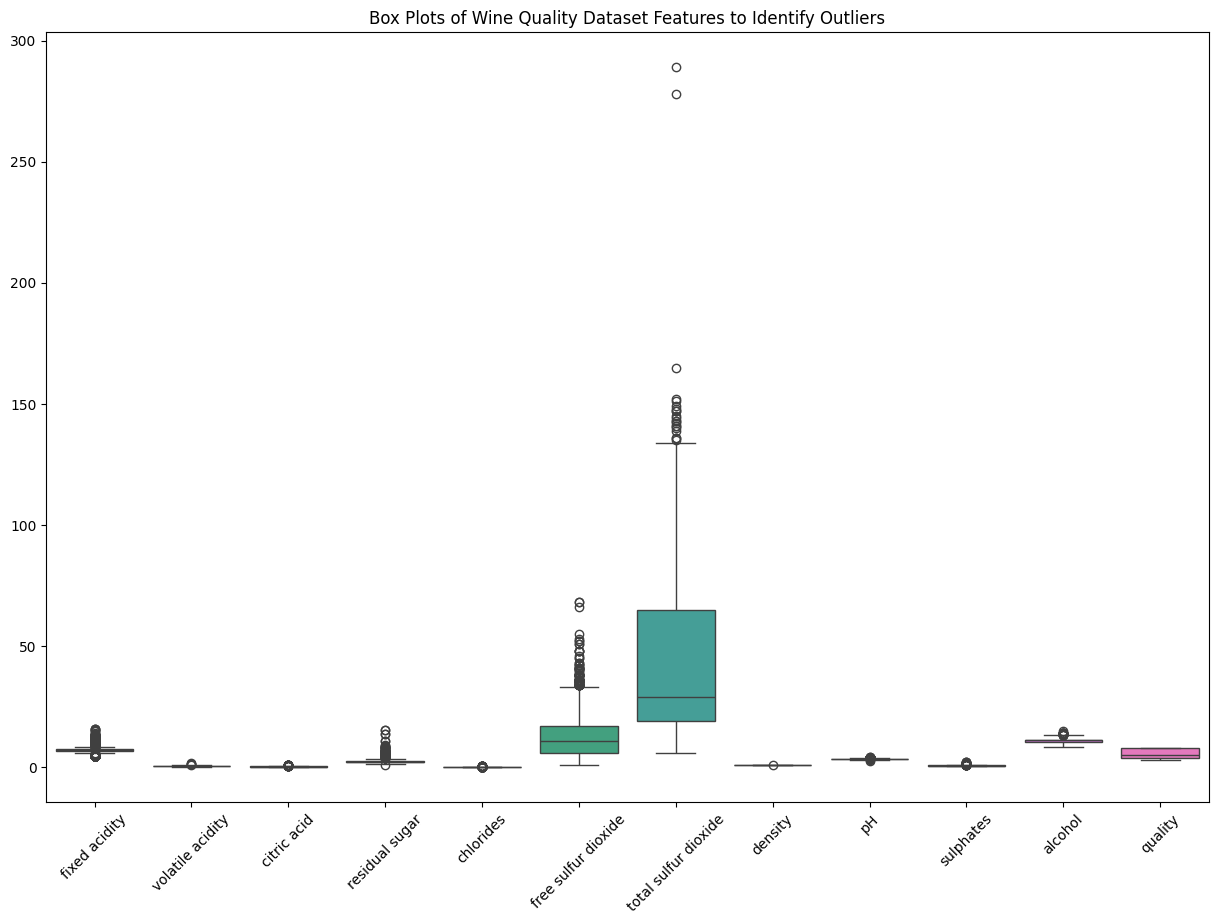

In [ ]:
# Create a box plot for each feature to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['Id']))  # Drop 'Id' if it is not relevant for outlier detection
plt.xticks(rotation=45)
plt.title('Box Plots of Wine Quality Dataset Features to Identify Outliers')
plt.show()

In [34]:
# Function to count the number of outliers in a column
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return outliers.sum()

# Get all the numerical columns (excluding 'Id' if present)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
if 'Id' in numerical_columns:
    numerical_columns = numerical_columns.drop('Id')

# Count and display the number of outliers for each numerical column
for column in numerical_columns:
    num_outliers = count_outliers(column)
    print(f"Number of outliers in {column}: {num_outliers}")


Number of outliers in fixed acidity: 972
Number of outliers in volatile acidity: 5
Number of outliers in citric acid: 27
Number of outliers in residual sugar: 549
Number of outliers in chlorides: 90
Number of outliers in free sulfur dioxide: 97
Number of outliers in total sulfur dioxide: 21
Number of outliers in density: 1
Number of outliers in pH: 508
Number of outliers in sulphates: 43
Number of outliers in alcohol: 17
Number of outliers in quality: 0


In [35]:
# Function to replace outliers with the mean for a given column

def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].mean(),
                         df[column])

In [36]:
def count_outliers_after_replacement(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Capping outliers to the lower and upper bounds
    df[column] = df[column].clip(lower_bound, upper_bound)

    # After capping, count outliers that are beyond the limits
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers.sum()

# Count and display the number of outliers after capping for each numerical column
for column in numerical_columns:
    num_outliers_after_replacement = count_outliers_after_replacement(df, column, multiplier=2.5)
    print(f"Number of outliers in {column} after replacement: {num_outliers_after_replacement}")


Number of outliers in fixed acidity after replacement: 0
Number of outliers in volatile acidity after replacement: 0
Number of outliers in citric acid after replacement: 0
Number of outliers in residual sugar after replacement: 0
Number of outliers in chlorides after replacement: 0
Number of outliers in free sulfur dioxide after replacement: 0
Number of outliers in total sulfur dioxide after replacement: 0
Number of outliers in density after replacement: 0
Number of outliers in pH after replacement: 0
Number of outliers in sulphates after replacement: 0
Number of outliers in alcohol after replacement: 0
Number of outliers in quality after replacement: 0


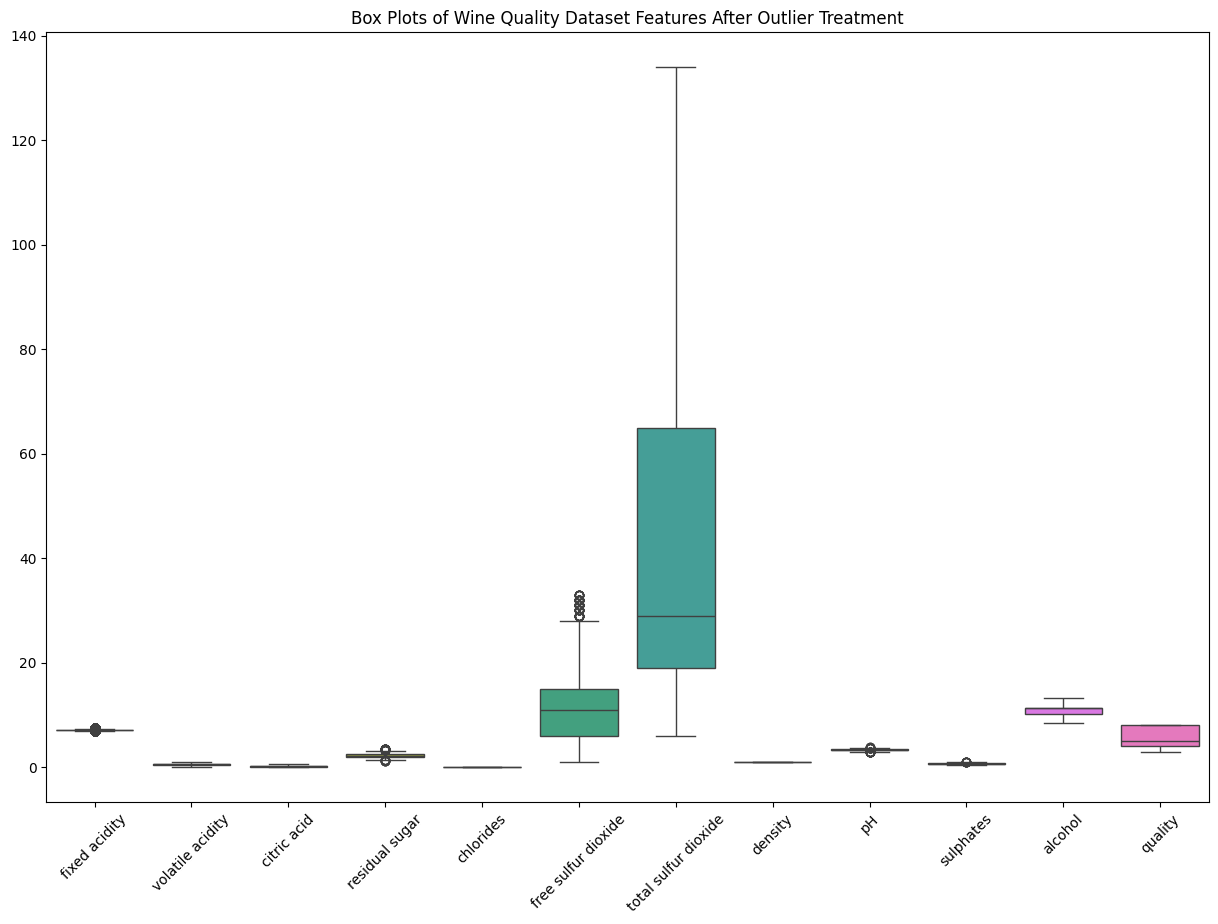

In [43]:
# Create a box plot for each feature after outlier removal
plt.figure(figsize=(15, 10))
for column in numerical_columns:
    count_outliers_after_replacement(df, column, multiplier=2.5)

sns.boxplot(data=df.drop(columns=['Id']))  # Drop 'Id' if it is not relevant for outlier detection
plt.xticks(rotation=45)
plt.title('Box Plots of Wine Quality Dataset Features After Outlier Treatment')
plt.show()

In [44]:
# Feature selection
X = df.drop('Id', axis=1)  # Selected all features except 'Id'
y=df['quality']
# Now X contains features for feature selection

In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
predictions =pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the predictions
print(predictions.head())

      Actual  Predicted
1048     5.0        5.0
1210     8.0        8.0
1014     6.0        6.0
2510     4.0        4.0
679      5.0        5.0


In [50]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[ 98   1   0   0   0   0]
 [  0 121   0   0   0   0]
 [  0   0 113   0   0   0]
 [  0   0   0  86   0   0]
 [  0   0   0   0  23   0]
 [  0   0   0   0   1 143]]

Classification Report:
              precision    recall  f1-score   support

         3.0       1.00      0.99      0.99        99
         4.0       0.99      1.00      1.00       121
         5.0       1.00      1.00      1.00       113
         6.0       1.00      1.00      1.00        86
         7.0       0.96      1.00      0.98        23
         8.0       1.00      0.99      1.00       144

    accuracy                           1.00       586
   macro avg       0.99      1.00      0.99       586
weighted avg       1.00      1.00      1.00       586


Accuracy Score:
Accuracy: 99.66%


In [ ]:

# Get user input for wine features
fixed_acidity = float(input("Enter fixed acidity: "))
volatile_acidity = float(input("Enter volatile acidity: "))
citric_acid = float(input("Enter citric acid: "))
residual_sugar = float(input("Enter residual sugar: "))
chlorides = float(input("Enter chlorides: "))
free_sulfur_dioxide = float(input("Enter free sulfur dioxide: "))
total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))
density = float(input("Enter density: "))
pH = float(input("Enter pH: "))
sulphates = float(input("Enter sulphates: "))
alcohol = float(input("Enter alcohol: "))

# Create a new DataFrame with the user input, include a placeholder for 'quality'
new_wine = pd.DataFrame({
    'fixed acidity': [fixed_acidity],
    'volatile acidity': [volatile_acidity],
    'citric acid': [citric_acid],
    'residual sugar': [residual_sugar],
    'chlorides': [chlorides],
    'free sulfur dioxide': [free_sulfur_dioxide],
    'total sulfur dioxide': [total_sulfur_dioxide],
    'density': [density],
    'pH': [pH],
    'sulphates': [sulphates],
    'alcohol': [alcohol],
    'quality': [0]
})

# Predict the quality using the trained model
predicted_quality = rf_model.predict(new_wine)

# Print the predicted quality
print(f"Predicted Wine Quality: {predicted_quality[0]}")


Enter fixed acidity: 7.2
Enter volatile acidity: 0.38
Enter citric acid: 0.31
Enter residual sugar: 2
Enter chlorides: 0.056
Enter free sulfur dioxide: 15
Enter total sulfur dioxide: 29
Enter density: 0.99472
Enter pH: 3.23
Enter sulphates: 0.76
Enter alcohol: 11.3
Predicted Wine Quality: 8.0
